# **Week 5: Cohort and Segment Analysis**

In [17]:
# Importing Libraries & Loading Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Indian_Kids_Screen_Time_Cleaned.csv")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

## Segment-wise Summary Tables and Visuals :-

In [28]:
# To Identify Top Cohorts

# 1. Age Band vs Device Category
cohort_age_device = (
    df.groupby(['Age_Band', 'Device_Category'])['Avg_Daily_Screen_Time_hr']
      .mean()
      .reset_index()
      .sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
)
print("Top 5 Age Band vs Device Category Cohorts by Average Screen Time:")
display(cohort_age_device.head(5))

# 2. Gender vs Primary Device

cohort_gender_device = (
    df.groupby(['Gender', 'Primary_Device'])['Avg_Daily_Screen_Time_hr']
      .mean()
      .reset_index()
      .sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
)

print("Top 5 Gender vs Primary Device Cohorts by Average Screen Time:")
display(cohort_gender_device.head(5))

Top 5 Age Band vs Device Category Cohorts by Average Screen Time:


,Age_Band,Device_Category,Avg_Daily_Screen_Time_hr
2,Pre-Teen,"Fixed TV (>30"" inch)",4.551061
4,Teenager,"Fixed TV (>30"" inch)",4.539986
3,Pre-Teen,"Portable (<30"" inch)",4.508054
5,Teenager,"Portable (<30"" inch)",4.507189
0,Child,"Fixed TV (>30"" inch)",3.932201


Top 5 Gender vs Primary Device Cohorts by Average Screen Time:


,Gender,Primary_Device,Avg_Daily_Screen_Time_hr
0,Female,Laptop,4.481066
5,Male,Smartphone,4.442463
4,Male,Laptop,4.435549
1,Female,Smartphone,4.332350
6,Male,TV,4.291868


**Key Insights from Top Cohorts (Gender vs Primary Device):**

*   The cohorts with the highest average daily screen time are **Females using Laptops** and **Males using Smartphones**, with average screen times around 4.48 and 4.44 hours respectively.
*   Males using Laptops and Females using Smartphones also have high average screen times, close to the top two cohorts.
*   TV and Tablet usage as the primary device generally results in slightly lower average screen times for both genders compared to Laptops and Smartphones in the top cohorts.

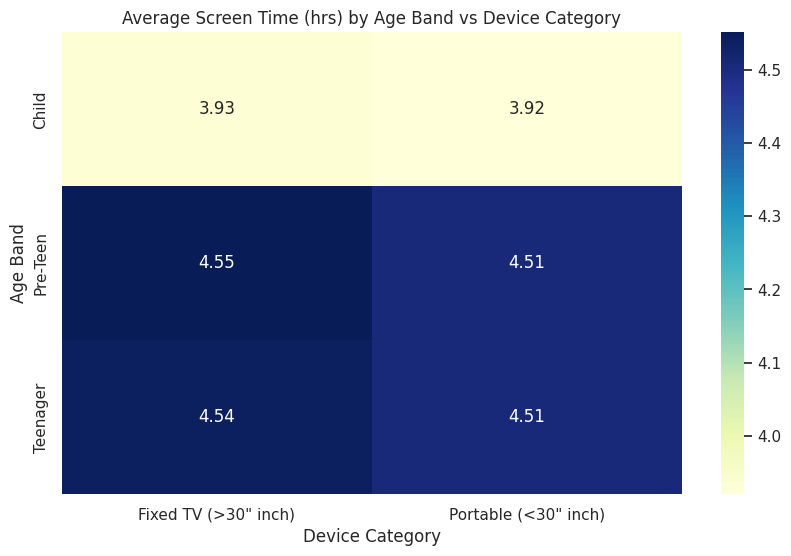

In [21]:
# Heatmap: Screen Time by Age Band vs Device Category
pivot_age_device = cohort_age_device.pivot(index='Age_Band', columns='Device_Category', values='Avg_Daily_Screen_Time_hr')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_age_device, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Screen Time (hrs) by Age Band vs Device Category")
plt.xlabel("Device Category")
plt.ylabel("Age Band")
plt.show()

**Key Insights from this heatmap:**

*   **Pre-Teens and Teenagers have the highest average screen time** across both "Fixed TV (>30" inch)" and "Portable (<30" inch)" device categories.
*   **Children have the lowest average screen time** in comparison to the other age bands for both device categories.
*   There is **very little difference in average screen time between "Fixed TV (>30" inch)" and "Portable (<30" inch)"** within each age band. The values are quite close.

This heatmap clearly shows that age band is a stronger differentiator of average screen time than the device category within this dataset.

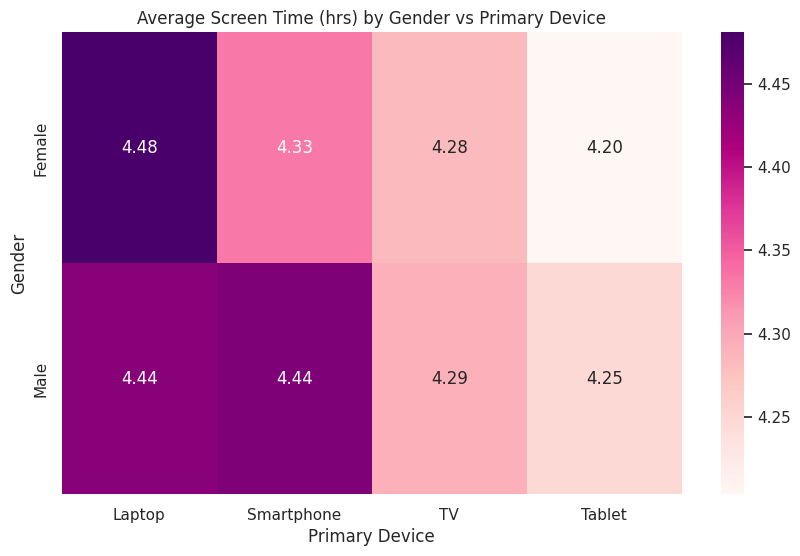

In [22]:
# Heatmap: Gender vs Primary Device
pivot_gender_device = cohort_gender_device.pivot(index='Gender', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_gender_device, annot=True, cmap='RdPu', fmt=".2f")
plt.title("Average Screen Time (hrs) by Gender vs Primary Device")
plt.xlabel("Primary Device")
plt.ylabel("Gender")
plt.show()

**Key Insights from this heatmap:**

*   **Laptops have the highest average screen time for Females**, while **Smartphones have the highest for Males**.
*   **TVs and Tablets generally show lower average screen times** for both genders compared to Laptops and Smartphones.
*   The differences in average screen time between genders within each device category are relatively small.

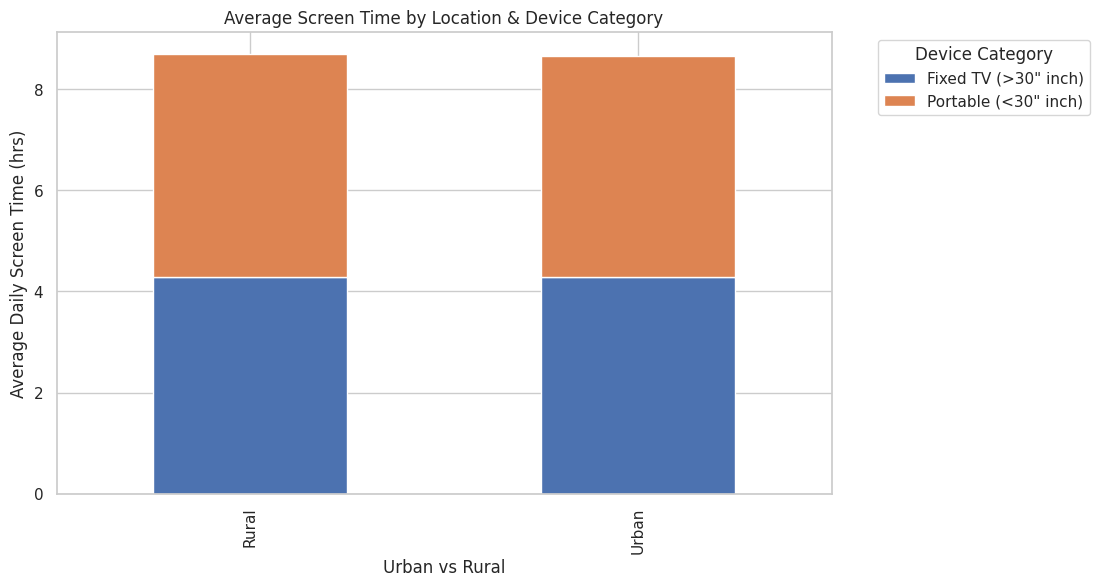

In [23]:
# Stacked Bar: Average Screen Time by Urban/Rural vs Device Category
urban_device = df.groupby(['Urban_or_Rural', 'Device_Category'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
urban_device.plot(kind='bar', stacked=True)
plt.title("Average Screen Time by Location & Device Category")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xlabel("Urban vs Rural")
plt.legend(title="Device Category", bbox_to_anchor=(1.05, 1))
plt.show()

**Key Insights from this stacked bar chart:**

*   There is **very little difference in the total average screen time between Urban and Rural locations**.
*   In both Urban and Rural areas, **"Portable (<30" inch)" devices contribute slightly more to the average screen time** compared to "Fixed TV (>30" inch)".
*   The overall pattern of screen time contribution from each device category is similar for both Urban and Rural locations.

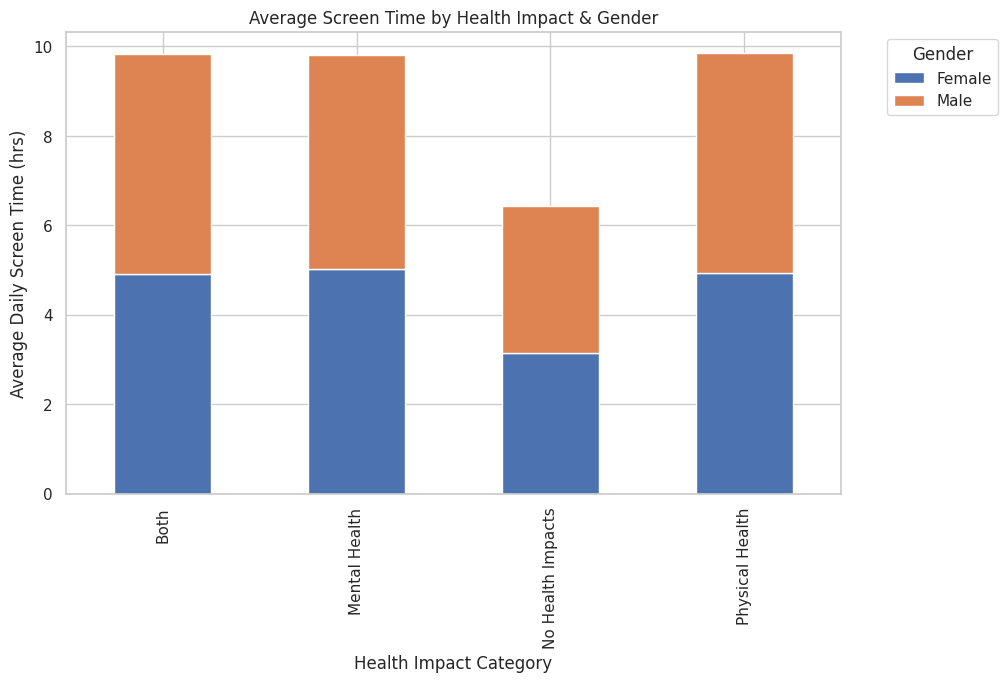

In [24]:
# Stacked Bar: Health Impact Category vs Gender
health_gender = df.groupby(['Health_Impact_Category', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
health_gender.plot(kind='bar', stacked=True)
plt.title("Average Screen Time by Health Impact & Gender")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xlabel("Health Impact Category")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1))
plt.show()

**Key Insights from this stacked bar chart:**

*   Individuals in the **'Both' and 'Physical Health' Health Impact Categories have the highest average screen times** for both genders.
*   Those in the **'No Health Impacts' category have significantly lower average screen time** compared to the other categories.
*   Within each Health Impact Category, the **difference in average screen time between genders is relatively small.**
*   The chart visually represents how average screen time is distributed across genders within each health impact category.

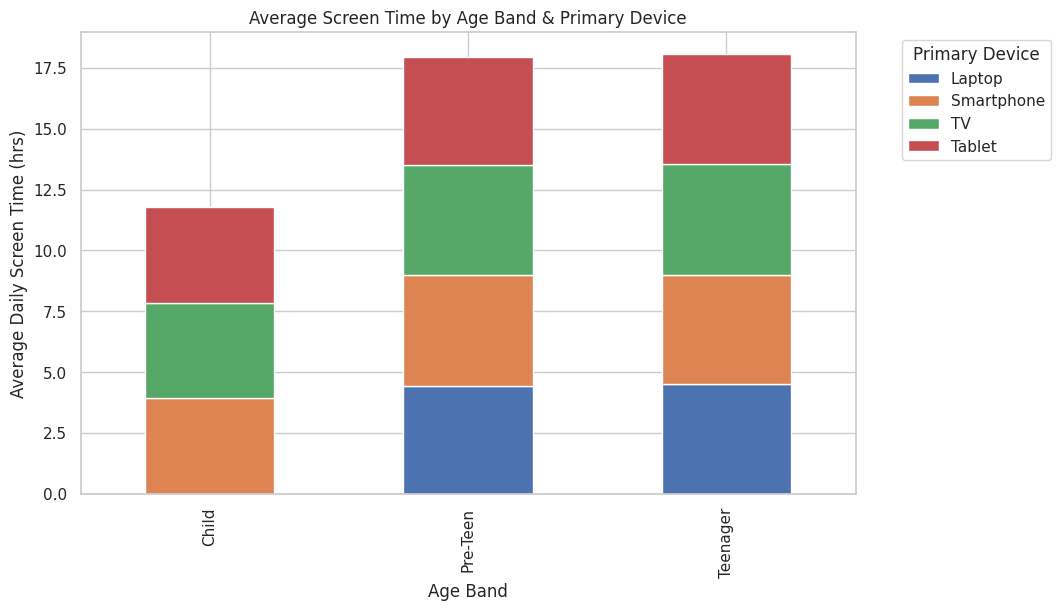

In [26]:
# Stacked Bar Chart: Average Screen Time by Age Band vs Primary Device
age_device_primary = df.groupby(['Age_Band', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
age_device_primary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Average Screen Time by Age Band & Primary Device")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xlabel("Age Band")
plt.legend(title="Primary Device", bbox_to_anchor=(1.05, 1))
plt.show()

**Key Insights from this stacked bar chart:**

*   In the **Child** age band, **TV, Smartphone, and Tablet have similar average screen times**, with Laptop having no data (NaN).
*   In the **Pre-Teen** and **Teenager** age bands, **all primary device categories contribute significantly to average screen time.**
*   **Smartphones and TVs** appear to contribute slightly more to the average screen time in the **Pre-Teen** and **Teenager** age bands compared to Laptops and Tablets.
*   The **total average screen time is highest for Pre-Teens and Teenagers** across all primary devices, reinforcing findings from other charts.

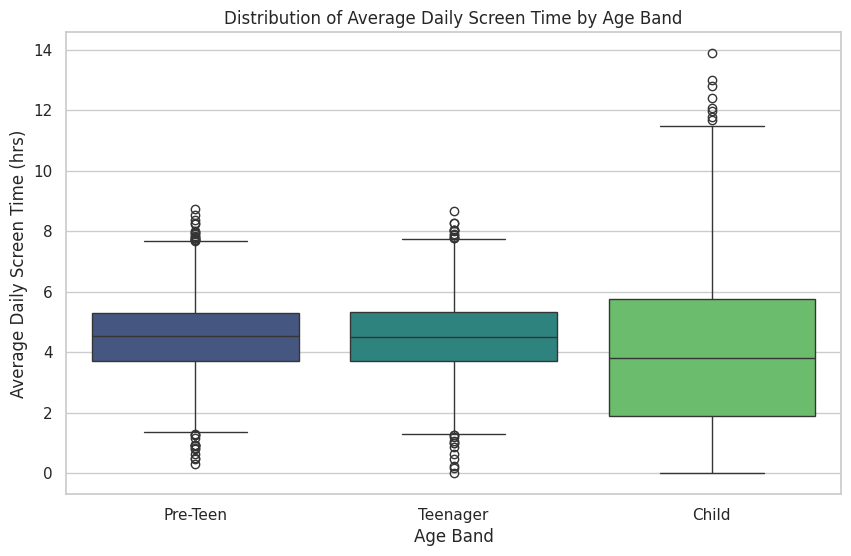

In [25]:
# Boxplot: Screen Time by Age Band
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=df, palette='viridis', hue='Age_Band', legend=False)
plt.title("Distribution of Average Daily Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.show()

**Key Insights from this boxplot:**

*   The **distribution of average daily screen time varies significantly across age bands.**
*   **Pre-Teens and Teenagers show higher median screen times and a wider range** of screen times compared to Children.
*   **Children have the lowest median screen time** and a narrower distribution.
*   There appear to be some **outliers with very high screen times**, particularly in the Pre-Teen and Teenager age bands.

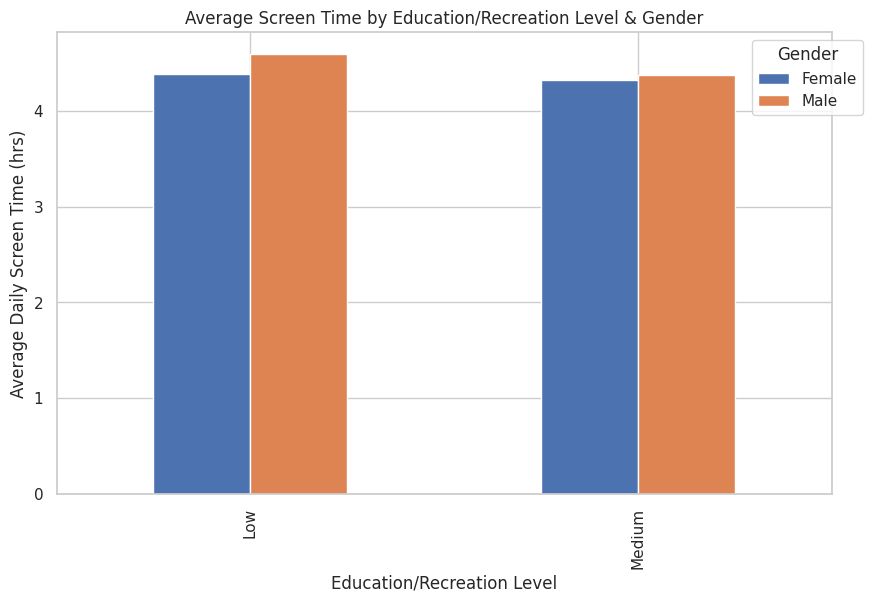

In [27]:
# Clustered Bar Chart: Average Screen Time by Education/Recreation Level vs Gender
edu_gender = df.groupby(['Edu_Recreation_Level', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean().unstack()
edu_gender.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Average Screen Time by Education/Recreation Level & Gender")
plt.ylabel("Average Daily Screen Time (hrs)")
plt.xlabel("Education/Recreation Level")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1))
plt.show()

**Key Insights from this clustered bar chart:**

*   There is **no significant difference in average screen time between 'Low' and 'Medium' Education/Recreation Levels.**
*   Within each Education/Recreation Level, the **difference in average screen time between genders is relatively small.**
*   Males show slightly higher average screen time than females in both 'Low' and 'Medium' categories.